Dimensionality Reduction Homework
This homework focuses on applying dimensionality reduction techniques to the MNIST dataset and evaluating the performance of each method in the context of a classification task using a K-Nearest Neighbors (KNN) classifier.

Instructions

Step 1: Data Preparation
Download the MNIST dataset from this link and save it as a numpy array. The dataset consists of 60,000 training images and 10,000 testing images of handwritten digits (0-9). Load the data into Python using the numpy library. Split the dataset into training and testing sets using an 80:20 ratio.

Step 2: Dimensionality Reduction
Apply the following dimensionality reduction techniques to the training set:

Principal Component Analysis (PCA) t-Distributed Stochastic Neighbor Embedding (t-SNE) Linear Discriminant Analysis (LDA) Singular Value Decomposition (SVD) For each technique:

Reduce the dimensions of the data. Visualize the reduced data using a scatter plot where each point is colored according to its digit label.

Step 3: Classification
Train a K-Nearest Neighbors (KNN) classifier with K = 5 on the reduced training data. Evaluate the performance of the classifier on the reduced testing data. Compare the classification performance of each dimensionality reduction technique based on: Classification accuracy Time taken to train the classifier

Step 1: Data Preparation


In [15]:
import numpy as np

def load_mnist(file_images, file_labels):

    with open(file_images, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
    with open(file_labels, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return images, labels

# Chemins vers les fichiers téléchargés
train_images_path = "/content/t10k-images.idx3-ubyte"
train_labels_path = "/content/t10k-labels.idx1-ubyte"
test_images_path = "/content/train-images.idx3-ubyte"
test_labels_path = "/content/train-labels.idx1-ubyte"

# Charger les données
# Use the correct path variables here
X_train, y_train = load_mnist(train_images_path, train_labels_path)
X_test, y_test = load_mnist(test_images_path, test_labels_path)

# Vérification des dimensions
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (10000, 28, 28), (10000,)
Test: (60000, 28, 28), (60000,)


In [16]:
#Diviser données

from sklearn.model_selection import train_test_split

# Aplatir les images de 28x28 en un vecteur de 784 dimensions
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Diviser les données d'entraînement (80% train, 20% test)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_flattened, y_train, test_size=0.2, random_state=42)

print(f"Train Split: {X_train_split.shape}, Validation Split: {X_val_split.shape}")


Train Split: (8000, 784), Validation Split: (2000, 784)


2 : Réduction de Dimension

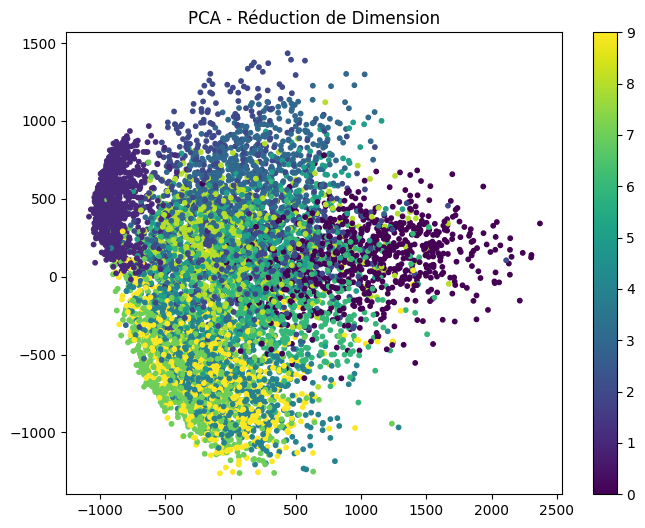

In [17]:
#1. PCA (Principal Component Analysis)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Appliquer PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_split)

# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_split, cmap='viridis', s=10)
plt.title('PCA - Réduction de Dimension')
plt.colorbar()
plt.show()


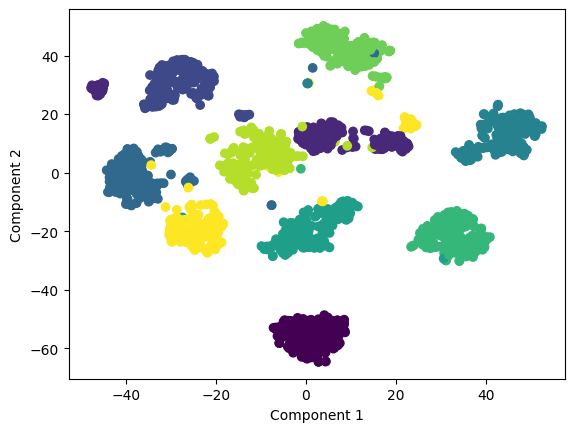

In [20]:
#2. t-SNE
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load dataset and apply t-SNE
digits = load_digits()
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(digits.data)

# Plot
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


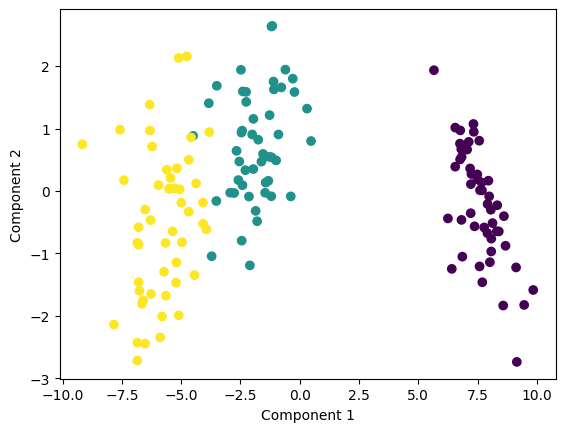

In [21]:
# 3. LDA

from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Load dataset and apply LDA
iris = load_iris()
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(iris.data, iris.target)

# Plot
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=iris.target)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

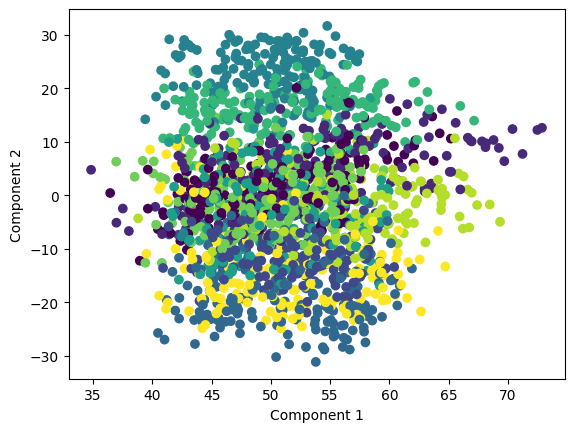

In [22]:
# 4. SVD

from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Load dataset and apply SVD
digits = load_digits()
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(digits.data)

# Plot
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=digits.target)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

3. Classification

In [24]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Appliquer KNN sur les données réduites (PCA par exemple)
knn = KNeighborsClassifier(n_neighbors=5)

# Entraîner le modèle
start_time = time.time()
knn.fit(X_train_pca, y_train_split)
train_time = time.time() - start_time

# Apply PCA transformation to the validation data before prediction
X_val_pca = pca.transform(X_val_split) #This line transforms the validation data using the fitted PCA

# Prédiction et évaluation
y_pred = knn.predict(X_val_pca) # Use the transformed validation data for prediction.
accuracy = accuracy_score(y_val_split, y_pred)

print(f"Temps d'entraînement (PCA): {train_time:.4f} secondes")
print(f"Précision (PCA): {accuracy:.4f}")

Temps d'entraînement (PCA): 0.0316 secondes
Précision (PCA): 0.4215
